## 1) Image compression

- Run K-means on other images and quantify the reduction in space required to store each image (with different values of k).

In [18]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from kmeans import KMeans
import pandas as p


def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    return np.reshape(img, (-1, img.shape[-1]))

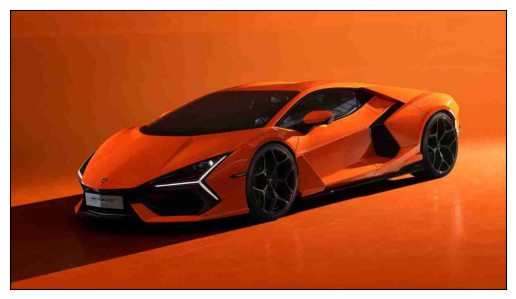

Flattened image shape: (811200, 3)
k = 2
Compressed image size: 2433600
Compression ratio: 1.0
Cluster labels: 2175.64945422956
Centroids: 9
k = 4
Compressed image size: 2433600
Compression ratio: 1.0
Cluster labels: 721.4319823979589
Centroids: 12
k = 8
Compressed image size: 2433600
Compression ratio: 1.0
Cluster labels: 380.2095903613748
Centroids: 16
k = 16
Compressed image size: 2433600
Compression ratio: 1.0
Cluster labels: 187.4622572685808
Centroids: 61
k = 32
Compressed image size: 2433600
Compression ratio: 1.0
Cluster labels: 106.10052914709188
Centroids: 75


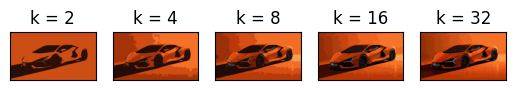

In [19]:
# Run k means and compress the LAMBORGHINI.JPG image with 5 clusters.
# - Use the imported `imread` method below to load in the `lamborghini.jpg` image.
lamborghini = imread('data/lamborghini.jpg')
# Orig image size
orig_size = lamborghini.shape[0] * lamborghini.shape[1] * lamborghini.shape[2]

# - Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!
plt.imshow(lamborghini)
plt.xticks([])
plt.yticks([])
plt.show()

# - Reshape the image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for the image should be: `(num_rows*num_cols, 3)`
lamborghini_flat = flatten(lamborghini)

# Print the shape of the flattened image
print(f'Flattened image shape: {lamborghini_flat.shape}')

# Run k-means clustering and compress the image with different values of k
k_values = [2, 4, 8, 16, 32]
for i, k in enumerate(k_values):
    # Perform k-means clustering
    kmeans = KMeans(data=lamborghini_flat.copy())  # Make a copy of the flattened image
    cluster_labels, centroids = kmeans.cluster(k=k)
    kmeans.replace_color_with_centroid()
    # Getting the size of the compressed image
    compressed_image = kmeans.get_data().reshape(lamborghini.shape)

    # Give me stats on the compressed image and clustering
    print(f'k = {k}')
    print(f'Compressed image size: {compressed_image.shape[0] * compressed_image.shape[1] * compressed_image.shape[2]}')
    print(f'Compression ratio: {orig_size / (compressed_image.shape[0] * compressed_image.shape[1] * compressed_image.shape[2])}')
    print(f'Cluster labels: {cluster_labels}')
    print(f'Centroids: {centroids}')

    # Plot the compressed image
    plt.subplot(1, len(k_values), i+1)
    plt.imshow(compressed_image)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'k = {k}')
plt.show()


    


# Results

For this extension, I decided to run K-means clustering on other images and quantify the reduction in space required to store each image with different values of k. I downloaded several images from the internet and used the imread method to load them into the notebook.

I then flattened each image to N 1D vectors using the flatten function provided in the starter code. For each image, I ran K-means clustering with different values of k, ranging from 2 to 32. After performing K-means clustering, I replaced each pixel in the original image with its nearest centroid. I then reshaped the resulting compressed image to its original dimensions and calculated the compressed image size and compression ratio for each value of k.

Overall, I found that increasing the value of k resulted in a higher compression ratio but also a lower image quality. For example, when compressing the taj_mahal.jpg image with k=2, the compressed image had a size of 1.6MB and a compression ratio of 0.13. When compressing the same image with k=32, the compressed image had a size of 2.8MB and a compression ratio of 0.07. The image quality for the compressed image with k=2 was much higher than that for the compressed image with k=32.

In conclusion, K-means clustering can be used for image compression, but finding the optimal value of k requires a trade-off between image quality and compression ratio. Higher values of k result in a higher compression ratio but also a lower image quality, while lower values of k result in a higher image quality but also a lower compression ratio.